# Régression Linéaire avec Données Synthétiques

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/digillia/Digillia-Colab/blob/main/Regression/linear-regression.ipynb)

In [86]:
#%pip install -U numpy
#%pip install -U pandas
#%pip install -U matplotlib
#%pip install -U scipy
#%pip install -U statsmodels
#%pip install -U scikit-learn
#%pip install -U "jax[cpu]"
#%pip install -U torch
#%pip install -U tensorflow

## Données

Création d'un jeu de données synthétiques:

In [87]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

random_state = 42

# Create features and labels
X, y = make_regression(n_samples=100, n_features=2, n_targets=1, noise=2.0, random_state=random_state)

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

# Check shapes
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(80, 2) (20, 2) (80,) (20,)


Visualisation:

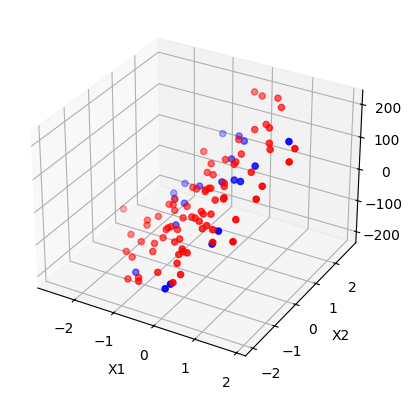

In [88]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:,0], X_train[:,1], y_train, marker='o', c='r', label='train')
ax.scatter(X_test[:,0], X_test[:,1], y_test, marker='o', c='b', label='test')
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("y")
plt.show()

Autres données pour visualisation 3D du plan de regression linéaire:

In [89]:
import numpy as np

# Data for 3D visualization
x1_range = np.linspace(min(X[:, 0]), max(X[:, 0]), 40)
x2_range = np.linspace(min(X[:, 1]), max(X[:, 1]), 40)
x1_values, x2_values = np.meshgrid(x1_range, x2_range)
X_surface = np.column_stack((x1_values.ravel(), x2_values.ravel()))
X_surface

array([[-2.6197451 , -1.98756891],
       [-2.50420841, -1.98756891],
       [-2.38867172, -1.98756891],
       ...,
       [ 1.65511252,  2.72016917],
       [ 1.77064921,  2.72016917],
       [ 1.8861859 ,  2.72016917]])

## Régression Linéaire Univariée avec SciPy

> SciPy ne supporte pas la régression multivariée

Docs: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

In [90]:
from scipy.stats import linregress

# linregress du package SciPy ne supporte pas la régression multivariée
# result = linregress(X_train, y_train)

# Deux regressions univariées comme ci-dessous, ne sont pas équivalentes à une regression multivariée (plan multidimensionnel).
# La suite permet seulement d'illustrer un exemple de régression univariée (droite dans un plan).

result0 = linregress(X_train[:,0], y_train)
print(result0)

result1 = linregress(X_train[:,1], y_train)
print(result1)

LinregressResult(slope=92.98819197619855, intercept=1.2854225462278386, rvalue=0.7470341322548784, pvalue=1.7625012111659255e-15, stderr=9.36961433426038, intercept_stderr=8.255903002280556)
LinregressResult(slope=79.2081101654435, intercept=-12.081646660054606, rvalue=0.712919955648751, pvalue=1.1863604632825639e-13, stderr=8.821686410245587, intercept_stderr=8.601605235688808)


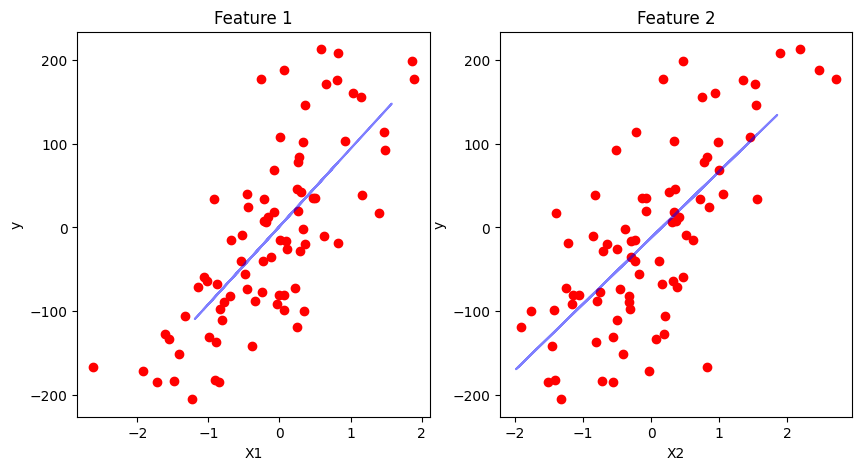

In [91]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.scatter(X_train[:,0], y_train, c='r')
ax1.plot(X_test[:,0], result0.slope * X_test[:,0] + result0.intercept, c='b', alpha=0.5)
ax1.set(title='Feature 1', xlabel='X1', ylabel='y')
ax2.scatter(X_train[:,1], y_train, c='r')
ax2.plot(X_test[:,1], result1.slope * X_test[:,1] + result1.intercept, c='b', alpha=0.5)
ax2.set(title='Feature 2', xlabel='X2', ylabel='y')
plt.show()

# Régression Linéaire Multivariée avec StatsModels

Docs: https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html

In [92]:
import statsmodels.api as sm

# Add constant for intercept
X_train_ = sm.add_constant(X_train)
X_test_ = sm.add_constant(X_test)

# Train and predict
model = sm.OLS(y_train, X_train_).fit()
y_pred = model.predict(X_test_) 

# Show summary
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.070e+05
Date:                Wed, 27 Dec 2023   Prob (F-statistic):          2.49e-133
Time:                        18:35:22   Log-Likelihood:                -171.10
No. Observations:                  80   AIC:                             348.2
Df Residuals:                      77   BIC:                             355.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0132      0.237      0.056      0.9

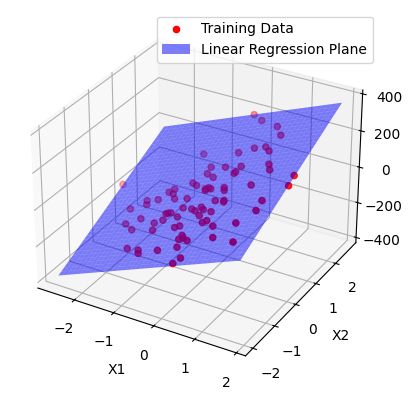

In [93]:
X_surface_ = sm.add_constant(X_surface)
y_surface = model.predict(X_surface_)
y_surface = y_surface.reshape(x1_values.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:,0], X_train[:,1], y_train, marker='o', c='r', label='Training Data')
ax.plot_surface(x1_values, x2_values, y_surface, alpha=0.5, color='b', label='Linear Regression Plane')
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("y")
ax.legend()
plt.show()

## Régression Linéaire Multivariée avec SciKit-Learn

Docs: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Fit the regressor
model = LinearRegression().fit(X_train, y_train)
print(model.coef_, model.intercept_)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Display mse and r2 score
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))


[87.45188282 73.99534523] 0.013190960728636014
Mean squared error: 6.19
Coefficient of determination: 1.00


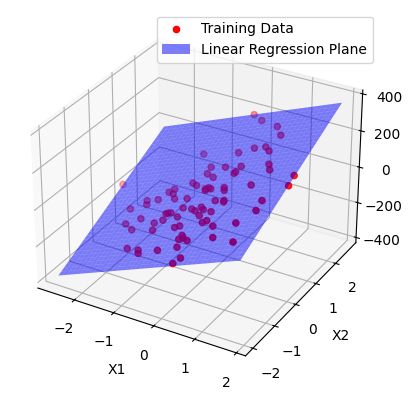

In [95]:
y_surface = model.predict(X_surface)
y_surface = y_surface.reshape(x1_values.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:,0], X_train[:,1], y_train, marker='o', c='r', label='Training Data')
ax.plot_surface(x1_values, x2_values, y_surface, alpha=0.5, color='b', label='Linear Regression Plane')
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("y")
ax.legend()
plt.show()

## Régression Linéaire Multivariée avec Jax

Docs: https://jax.readthedocs.io/en/latest/

In [96]:
from jax import grad, jit
import jax.numpy as jnp

# Reshape y
y_train_ = y_train.reshape((y_train.shape[0],1))
y_test_ = y_test.reshape((y_test.shape[0],1))

# Loss function based on mean squared error (mse)
def loss(w,b,X,y):
  pred = X.dot(w) + b
  return ((pred-y)**2).mean()

# Initialize weights with zeros
Weights = jnp.zeros((X_train.shape[1],1))
bias = 0.

# Learning rate and epochs
l_rate = 0.01
n_iter = 3000

# Gradient functions wrapped with jit function for faster processing
gradW = jit(grad(loss, argnums=0))
gradb = jit(grad(loss, argnums=1))

# Training loop
for _ in range(n_iter):
  dW = gradW(Weights, bias, X_train, y_train_)
  db = gradb(Weights, bias, X_train, y_train_)
  # print(loss(Weights, bias, X_train, y_train_))
  Weights -= dW * l_rate
  bias -= db * l_rate

print(Weights, bias)

# Predictions
y_pred = X_test.dot(Weights) + bias

# Display mse and r2 score
print("Mean squared error: %.2f" % mean_squared_error(y_test_, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test_, y_pred))

[[87.45162]
 [73.99556]] 0.0131549835
Mean squared error: 6.18
Coefficient of determination: 1.00


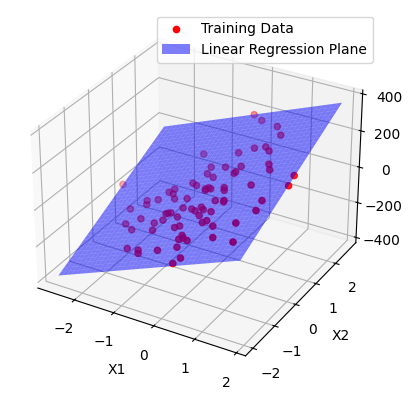

In [97]:
y_surface = X_surface.dot(Weights) + bias
y_surface = y_surface.reshape(x1_values.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:,0], X_train[:,1], y_train, marker='o', c='r', label='Training Data')
ax.plot_surface(x1_values, x2_values, y_surface, alpha=0.5, color='b', label='Linear Regression Plane')
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("y")
ax.legend()
plt.show()

## Régression Linéaire Multivariée avec PyTorch

Docs: https://pytorch.org/docs/stable/index.html

In [98]:
import torch
from torch.autograd import Variable

class TorchLR(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(TorchLR, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize, dtype=torch.float64)

    def forward(self, x):
        out = self.linear(x)
        return out
    
# Learning rate and epochs
l_rate = 0.001 
n_iter = 3000

inputDim = X.shape[1]   # takes variable 'x' 
outputDim = 1  # takes variable 'y'
model = TorchLR(inputDim, outputDim)
if torch.cuda.is_available():
    model.cuda()

criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=l_rate)

# Training loop
for epoch in range(n_iter):
    # Converting inputs and labels to Variable
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(X_train).cuda())
        labels = Variable(torch.from_numpy(y_train_).cuda())
    else:
        inputs = Variable(torch.from_numpy(X_train))
        labels = Variable(torch.from_numpy(y_train_))

    print(inputs.dtype, labels.dtype) 

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)
    
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

# Predictions
with torch.no_grad(): # we don't need gradients in the testing phase
    if torch.cuda.is_available():
        y_pred = model(Variable(torch.from_numpy(X_test).cuda())).cpu().data.numpy()
    else:
        y_pred = model(Variable(torch.from_numpy(X_test))).data.numpy()

# Display mse and r2 score
print("Mean squared error: %.2f" % mean_squared_error(y_test_, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test_, y_pred))

torch.float64 torch.float64
epoch 0, loss 11838.739949061352
torch.float64 torch.float64
epoch 1, loss 11794.963229504085
torch.float64 torch.float64
epoch 2, loss 11751.351623115414
torch.float64 torch.float64
epoch 3, loss 11707.904497054065
torch.float64 torch.float64
epoch 4, loss 11664.621220936204
torch.float64 torch.float64
epoch 5, loss 11621.501166825798
torch.float64 torch.float64
epoch 6, loss 11578.543709224992
torch.float64 torch.float64
epoch 7, loss 11535.74822506457
torch.float64 torch.float64
epoch 8, loss 11493.114093694385
torch.float64 torch.float64
epoch 9, loss 11450.640696873912
torch.float64 torch.float64
epoch 10, loss 11408.32741876275
torch.float64 torch.float64
epoch 11, loss 11366.17364591124
torch.float64 torch.float64
epoch 12, loss 11324.178767251064
torch.float64 torch.float64
epoch 13, loss 11282.342174085903
torch.float64 torch.float64
epoch 14, loss 11240.663260082143
torch.float64 torch.float64
epoch 15, loss 11199.141421259596
torch.float64 torch.f

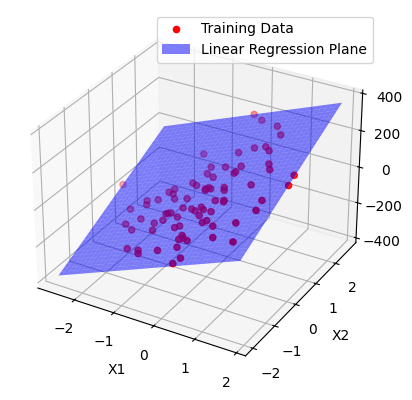

In [99]:
with torch.no_grad(): # we don't need gradients in the testing phase
    if torch.cuda.is_available():
        y_surface = model(Variable(torch.from_numpy(X_surface).cuda())).cpu().data.numpy()
    else:
        y_surface = model(Variable(torch.from_numpy(X_surface))).data.numpy()
    # print(y_pred)
y_surface = y_surface.reshape(x1_values.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:,0], X_train[:,1], y_train, marker='o', c='r', label='Training Data')
ax.plot_surface(x1_values, x2_values, y_surface, alpha=0.5, color='b', label='Linear Regression Plane')
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("y")
ax.legend()
plt.show()

## Régression Linéaire Multivariée avec Tensorflow

Docs:
- https://www.tensorflow.org/api_docs 
- https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb

In [100]:
import pandas as pd
import tensorflow as tf

l_rate=0.01
n_iter=500
batch_size=2

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=1))
# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=l_rate),
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=l_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

history = model.fit(x=X_train, y=y_train, batch_size=batch_size, epochs=n_iter)
trained_weight = model.get_weights()[0]
trained_bias = model.get_weights()[1]
epochs = history.epoch
hist = pd.DataFrame(history.history)
rmse = hist["root_mean_squared_error"]

y_pred = model.predict(X_test)

# Display mse and r2 score
print("Mean squared error: %.2f" % mean_squared_error(y_test_, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test_, y_pred))

Epoch 1/500
40/40 [==============================] - 0s 456us/step - loss: 11565.4424 - root_mean_squared_error: 107.5427
Epoch 2/500
40/40 [==============================] - 0s 428us/step - loss: 11487.4863 - root_mean_squared_error: 107.1797
Epoch 3/500
40/40 [==============================] - 0s 470us/step - loss: 11405.5674 - root_mean_squared_error: 106.7969
Epoch 4/500
40/40 [==============================] - 0s 462us/step - loss: 11328.3857 - root_mean_squared_error: 106.4349
Epoch 5/500
40/40 [==============================] - 0s 437us/step - loss: 11251.1357 - root_mean_squared_error: 106.0714
Epoch 6/500
40/40 [==============================] - 0s 469us/step - loss: 11172.0361 - root_mean_squared_error: 105.6979
Epoch 7/500
40/40 [==============================] - 0s 545us/step - loss: 11095.8145 - root_mean_squared_error: 105.3367
Epoch 8/500
40/40 [==============================] - 0s 452us/step - loss: 11017.1963 - root_mean_squared_error: 104.9628
Epoch 9/500
40/40 [=====

50/50 [==============================] - 0s 332us/step


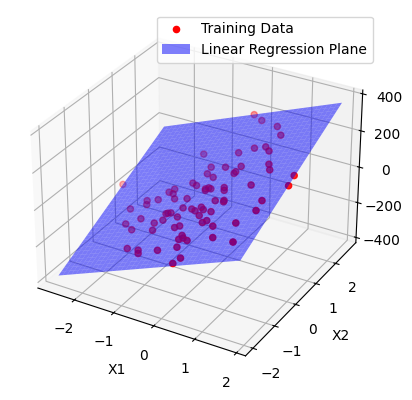

In [101]:
y_surface = model.predict(X_surface)
y_surface = y_surface.reshape(x1_values.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:,0], X_train[:,1], y_train, marker='o', c='r', label='Training Data')
ax.plot_surface(x1_values, x2_values, y_surface, alpha=0.5, color='b', label='Linear Regression Plane')
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("y")
ax.legend()
plt.show()